# <center> S.Alireza Mousavizade </center>
## <center> 97106284 </center>

---

In [896]:
# using Pkg
# Pkg.add("DataFrames");
# Pkg.add("IJulia");
# Pkg.add("CSV");
# Pkg.add("PlotlyJS")

In [897]:
using DataFrames, CSV

--- 
# 1

In [898]:
data = DataFrame(CSV.File("crypto_data.csv"));

first(data, 5)

,Date,BTC-USD,ETH-USD,XRP-USD,SOL-USD,LUNA1-USD,ADA-USD,AVA-USD
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2021-01-01,29374.2,730.368,0.237444,1.84208,0.649443,0.17535,0.794505
2,2021-01-02,32127.3,774.535,0.221655,1.79928,0.631426,0.177423,0.761348
3,2021-01-03,32782.0,975.508,0.225848,2.16175,0.661895,0.204995,0.760217
4,2021-01-04,31971.9,1040.23,0.236677,2.4851,0.670244,0.224762,0.818082
5,2021-01-05,33992.4,1100.01,0.22675,2.15722,0.716674,0.258314,0.887216


In [899]:
rename!(data, [
    :Date,
    :BTC,
    :ETH,
    :XRP,
    :SOL,
    :LUNA,
    :ADA,
    :AVA,
    :DOT,
    :DOGE,
    :MATIC,
]);

In [900]:
symbols = propertynames(data);
symbols

11-element Vector{Symbol}:
 :Date
 :BTC
 :ETH
 :XRP
 :SOL
 :LUNA
 :ADA
 :AVA
 :DOT
 :DOGE
 :MATIC

In [901]:
top5_market_cap_currencies_symbols = symbols[1:6];
df = data[!, top5_market_cap_currencies_symbols];

first(df, 5)

,Date,BTC,ETH,XRP,SOL,LUNA
,Date,Float64,Float64,Float64,Float64,Float64
1,2021-01-01,29374.2,730.368,0.237444,1.84208,0.649443
2,2021-01-02,32127.3,774.535,0.221655,1.79928,0.631426
3,2021-01-03,32782.0,975.508,0.225848,2.16175,0.661895
4,2021-01-04,31971.9,1040.23,0.236677,2.4851,0.670244
5,2021-01-05,33992.4,1100.01,0.22675,2.15722,0.716674


In [902]:
using Statistics: mean, std

symbols = propertynames(df);
for symbol ∈ symbols
    if eltype(df[!, symbol]) == Float64
        df[:, string(symbol)*"_normalized"] = (df[:, symbol] .- mean(df[:, symbol])) ./ std(df[:, symbol])
    end
end

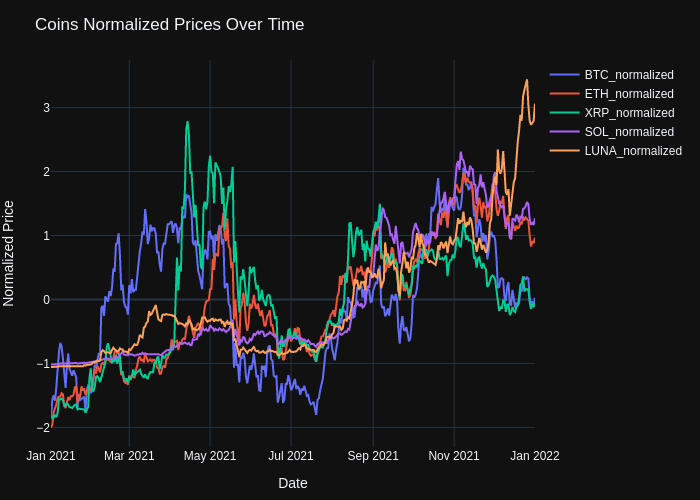

In [903]:
using PlotlyJS

templates.default = "plotly_dark";
templates

currency_symbols = Symbol.(names(df)[7:11]);

# marker=attr(size=2, line=attr(width=1, color="Red")),
# PlotlyJS.Layout(
#     title="Sharpe",
#     width=800, height=800,
# )
# )

plot(
    [scatter(df, x=:Date, y=symbol, mode="lines", name=string(symbol)) for symbol in currency_symbols],
    PlotlyJS.Layout(
        title="Coins Normalized Prices Over Time", 
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="Normalized Price",
     )
)

# Return:

#### Yearly Compound Return Rate:
 $\Pi_i (1 + r_i)$ where $r_i$ is daily return
#### Geometric Mean Daily Return:
 $\{\Pi_i (1 + r_i)\}^{\frac{1}{365}} - 1$ 


In [904]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;

In [905]:
symbols = propertynames(df[!, 2:6]);
results = DataFrame(CurrencySymbol=String[], YearlyCompoundReturn=Float64[], DailyAverageReturn=Float64[]);

all_coin_so_far_returns = DataFrame()

all_coin_so_far_returns[!, :Date] = df[2:end, :Date];
for (k, symbol) ∈ enumerate(symbols)
    returns = pct_change(df[!, symbol])
    n_interval = size(returns, 1)
    push!(results, [string(symbol), prod(returns .+ 1), prod(returns .+ 1)^(1 / n_interval) - 1])

    ###

    symbol_so_far_return = 0;
    symbol_so_far_returns = zeros(Float64, size(returns));
    for (k, ret) ∈ enumerate(returns)
        symbol_so_far_return = (symbol_so_far_return + 1) * (ret + 1) - 1;
        symbol_so_far_returns[k] = symbol_so_far_return;
    end

    all_coin_so_far_returns[!, symbol] = symbol_so_far_returns;
end

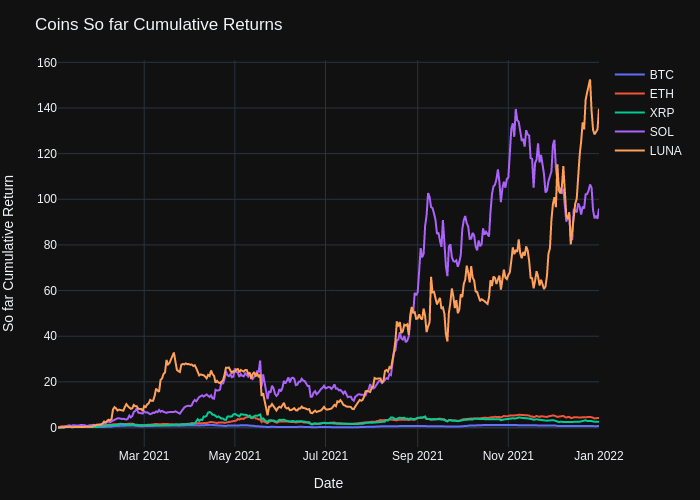

In [906]:
using PlotlyJS

templates.default = "plotly_dark";
templates

coins_symbols = propertynames(all_coin_so_far_returns)[2:end]
# marker=attr(size=2, line=attr(width=1, color="Red")),
# PlotlyJS.Layout(
#     title="Sharpe",
#     width=800, height=800,
# )
# )

plot(
    [scatter(all_coin_so_far_returns, x=:Date, y=symbol, mode="lines", name=string(symbol)) for symbol in coins_symbols],
    PlotlyJS.Layout(
        title="Coins So far Cumulative Returns",
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="So far Cumulative Return",)
)

--- 

# 2


 Due to the crisis in the Terra project and the near-zero price of this coin, in this section, the prices from the second half of 2021 to the beginning of 2022 have been examined.

In [907]:
data = DataFrame(CSV.File("crypto_data.csv"));

rename!(data, [
    :Date,
    :BTC,
    :ETH,
    :XRP,
    :SOL,
    :LUNA,
    :ADA,
    :AVA,
    :DOT,
    :DOGE,
    :MATIC,
]);

### Filter Dates

In [908]:
using Dates: Date
df = filter(:Date => d -> d ≥ Date(2021, 6, 1), data);

### Compute Returns

In [909]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;

results = DataFrame(
    CurrencySymbol=String[],
    CumulativeReturnInBTCNegativeDays=Float64[],
    CumulativeReturnInBTCPositiveDays=Float64[]
);

symbols = propertynames(df[!, 2:end]);
symbols_returns = DataFrame()

symbols_returns[!, :Date] = df[2:end, :Date];
symbols_returns[!, :BTC] = btc_returns = pct_change(df[!, :BTC]);

altcoins_symbols = symbols[2:end];
btc_returns = symbols_returns[!, :BTC];

cumulative_return(returns) = prod(returns .+ 1);

for (k, altcoin_symbol) ∈ enumerate(altcoins_symbols)
    altcoin_returns = symbols_returns[!, altcoin_symbol] = pct_change(df[!, altcoin_symbol])

    altcoin_returns_in_btc_negative_days = altcoin_returns[btc_returns.<0]
    btc_negative_days_cumulative_return = cumulative_return(altcoin_returns_in_btc_negative_days)

    altcoin_returns_in_btc_positive_days = altcoin_returns[btc_returns.≥0]
    btc_positive_days_cumulative_return = cumulative_return(altcoin_returns_in_btc_positive_days)

    push!(results,
        [string(altcoin_symbol),
            btc_negative_days_cumulative_return,
            btc_positive_days_cumulative_return])
end

results


,CurrencySymbol,CumulativeReturnInBTCNegativeDays,CumulativeReturnInBTCPositiveDays
,String,Float64,Float64
1,ETH,0.0540288,26.4939
2,XRP,0.0407911,20.5983
3,SOL,0.158733,36.296
4,LUNA,0.373464,38.8056
5,ADA,0.0568252,13.9684
6,AVA,0.0651094,9.85862
7,DOT,0.0238423,52.5566
8,DOGE,0.0268315,17.4259
9,MATIC,0.0275728,51.2757


--- 

# 3

In [910]:
data = DataFrame(CSV.File("crypto_data2.csv"));

rename!(data, [
    :Date,
    :BTC,
    :ETH,
    :XRP,
    :SOL,
    :LUNA,
    :ADA,
    :AVA,
    :DOT,
    :DOGE,
    :MATIC,
]);

### Calculate Retruns Data

In [911]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;
function calculate_returns_data(prices_data)
    symbols = propertynames(prices_data[!, 1:end])
    returns_data = DataFrame()
    for (k, symbol) ∈ enumerate(symbols)
        returns_data[!, symbol] = pct_change(prices_data[!, symbol])
    end
    returns_data
end;

## Portfolio Structure

In [912]:
mutable struct Portfolio
    weights::Vector{Float64}
    symbols::Vector{Symbol}

    prices_data::DataFrame
    returns_data::DataFrame

    function Portfolio(
        prices_data::DataFrame,
        weights::Vector{Float64},
        symbols::Vector{Symbol})

        returns_data = calculate_returns_data(prices_data)
        new(weights, symbols, prices_data, returns_data)
    end
end

## Portfolio Return

In [913]:
symbol_returns(returns_data, symbol::Symbol) = returns_data[!, symbol];

symbol_cumulative_return(returns::Vector{Float64}) = prod(returns .+ 1);

function portfolio_return(portfolio::Portfolio)
    portfo_symbols_returns = symbol_returns.(Ref(portfolio.returns_data), portfolio.symbols)
    portfo_symbols_cumulative_returns = symbol_cumulative_return.(portfo_symbols_returns)
    portfo_symbols_weighted_returns = portfolio.weights .* portfo_symbols_cumulative_returns
    portfo_symbols_total_returns = sum(portfo_symbols_weighted_returns)
end;

### Sample:

In [914]:
portfo_symbols = [:BTC, :ETH, :XRP]
portfo = Portfolio(data[:, portfo_symbols], [0.25, 0.25, 0.5], portfo_symbols);
portfo_return = portfolio_return(portfo);
portfo_return

10.958589044884139

## Portfolio Variance

The sample covariance matrix is a $K \times K$ matrix ${\displaystyle \textstyle \mathbf{Q} =\left[q_{jk}\right]}$ with entries:

$$
    q_{jk} = \frac{1}{N - 1} \sum_{i=1}^{n} (x_{ij} - \bar{x}_j) (x_{ik} - \bar{x}_k)
$$

where ${\displaystyle q_{jk}}$ is an estimate of the covariance between the $\mathrm{j^{th}}$ variable and $\mathrm{k^{th}}$ variable of the population underlying the data. In terms of the observation vectors, the sample covariance is:

$$
    \mathbf{Q} = \frac{1}{N - 1} \sum_{i=1}^{n} 
    \mathbf{(x_i - \bar{x}) (x_i - \bar{x})^T}
$$

In [915]:
using Statistics: cov, var

function portfolio_variance(portfolio::Portfolio)
    Q = cov(Matrix(portfolio.returns_data))
    w = portfolio.weights
    portfo_variance = w' * Q * w
    portfo_variance
end;

### Sample:

In [916]:
portfo_symbols = [:BTC, :ETH, :XRP]
portfo = Portfolio(data[!, portfo_symbols], [0.25, 0.25, 0.5], portfo_symbols);
portfo_variance = portfolio_variance(portfo);
portfo_variance

0.0021872686334937887

## Sharp Ratio

In [917]:
function sharp_ratio(portfolio::Portfolio; risk_free_rate=0.02)
    portfo_return = portfolio_return(portfolio)
    portfo_std = portfolio_variance(portfolio)^0.5
    sharp_ratio = (portfo_return - risk_free_rate) / portfo_std
    sharp_ratio
end;

### Sample:

In [918]:
portfo_symbols = [:BTC, :ETH, :XRP]
portfo = Portfolio(data[:, portfo_symbols], [0.25, 0.25, 0.5], portfo_symbols);
portfo_sharp_ratio = sharp_ratio(portfo);
portfo_sharp_ratio

233.88924070498265

## Calculate Return, Variance and Sharpe Ratio for each weights combination

### Find all Triplets ($w_1, w_2, w_3$) Such That: $w_1 + w_2 + w_3 = 1$

In [919]:
step = 0.01;
possibilities = 0:step:1;
triplets = [];

for p1 ∈ possibilities
    for p2 ∈ possibilities
        for p3 ∈ possibilities
            if p1 + p2 + p3 ≈ 1
                push!(triplets, [p1, p2, p3])
            end
        end
    end
end

In [920]:
results = DataFrame();

portfo_symbols = [:BTC, :ETH, :XRP];
n = length(portfo_symbols);

# Add Weights Columns
results[!, :Weights] = triplets;

# Add StandardDeviations Columns
transform!(
    results,
    [:Weights] => ByRow(weights -> portfolio_variance(Portfolio(data[!, portfo_symbols], weights, portfo_symbols))^0.5) => :PortfolioStandardDeviation
);

# Add Returns Columns
transform!(
    results,
    [:Weights] => ByRow(weights -> portfolio_return(Portfolio(data[!, portfo_symbols], weights, portfo_symbols))) => :PortfolioReturn
);

# Add SharpRatio Columns
transform!(
    results,
    [:Weights] => ByRow(weights -> sharp_ratio(Portfolio(data[!, portfo_symbols], weights, portfo_symbols), risk_free_rate=0.0)) => :PortfolioSharpeRatio
);

first(results, 5)

,Weights,PortfolioStandardDeviation,PortfolioReturn,PortfolioSharpeRatio
,Any,Float64,Float64,Float64
1,"[0.0, 0.0, 1.0]",0.0617733,2.32878,37.6988
2,"[0.0, 0.01, 0.99]",0.061459,2.57319,41.8684
3,"[0.0, 0.02, 0.98]",0.061147,2.8176,46.0791
4,"[0.0, 0.03, 0.97]",0.0608376,3.06201,50.3308
5,"[0.0, 0.04, 0.96]",0.0605308,3.30642,54.6237


In [921]:
using PlotlyJS

In [922]:
templates.default = "plotly_dark";
PlotlyJS.templates

Templates configuration
-----------------------
Default template: plotly_dark
Available templates: [:presentation, :plotly_dark, :ggplot2, :plotly, :seaborn, :ygridoff, :plotly_white, :simple_white, :xgridoff, :gridon]



In [923]:
vector_string_represent(vector::Vector) = "Weights: " * join(vector, ", ");

results[!, :WeightsStringRepresent] = vector_string_represent.(results[!, :Weights]);

### Maximum Sharpe Ratio Portfolio

In [924]:
maximum_sharp_ratio_portfolio_index = argmax(results[!, :PortfolioSharpeRatio]);
efficient_frontier_portfo_results = results[maximum_sharp_ratio_portfolio_index, :];
optimum_weights, optimum_portfo_std, optimum_portfo_return, optimum_portfo_sharpe_ratio = efficient_frontier_portfo_results

efficient_frontier_portfo_results

,Weights,PortfolioStandardDeviation,PortfolioReturn,PortfolioSharpeRatio
,Any,Float64,Float64,Float64
101,"[0.0, 1.0, 0.0]",0.0492118,26.7697,543.97


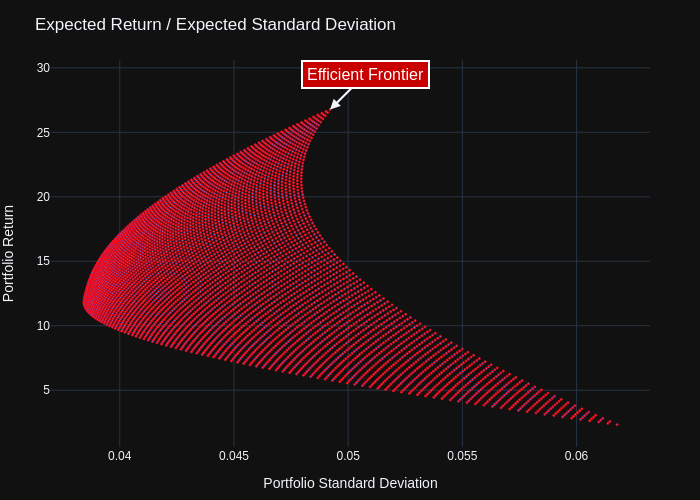

In [925]:
annotation = [
    attr(
        x=optimum_portfo_std,
        y=optimum_portfo_return,
        text="Efficient Frontier",
        showarrow=true,
        font=attr(
            # family="Courier New, monospace",
            size=16,
            color="rgb(255, 255, 255)"
        ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="(255, 255, 255)",
        ax=35,
        ay=-35,
        bordercolor="rgb(255, 255, 255)",
        borderwidth=2,
        borderpad=4,
        bgcolor="#rgb(200, 0, 0)",
        opacity=1.0
    )
]

ax = plot(
    results,
    x=:PortfolioStandardDeviation,
    y=:PortfolioReturn,
    text=:WeightsStringRepresent,
    kind="scatter",
    mode="markers",
    labels=Dict(
        :PortfolioStandardDeviation => "Portfolio Standard Deviation",
        :PortfolioReturn => "Portfolio Return",
    ),
    marker=attr(size=2, line=attr(width=1, color="Red")),
    PlotlyJS.Layout(
        title="Expected Return / Expected Standard Deviation",
        width=800, height=800,
        annotations=annotation
    )
)

In [926]:
CSV.write("portfolio.csv", df);

---

# 4

In [927]:
data = DataFrame(CSV.File("crypto_data.csv"));

rename!(data, [
    :Date,
    :BTC,
    :ETH,
    :XRP,
    :SOL,
    :LUNA,
    :ADA,
    :AVA,
    :DOT,
    :DOGE,
    :MATIC,
]);

In [928]:
btc_prices = data[!, [:Date, :BTC]];

In [929]:
using PlotlyJS

templates.default = "plotly_dark";
PlotlyJS.templates

Templates configuration
-----------------------
Default template: plotly_dark
Available templates: [:presentation, :plotly_dark, :ggplot2, :plotly, :seaborn, :ygridoff, :plotly_white, :simple_white, :xgridoff, :gridon]



In [930]:
using Indicators: sma, ema, wma, trima, crossover, crossunder

In [931]:
moving_average_results = DataFrame();
moving_average_results = btc_prices[:, :];
moving_average_results = rename(moving_average_results, :BTC => :RawPrice);

step = 5;
[moving_average_results[:, "SMA_$(d)Days"] = sma(btc_prices[:, :BTC], n=d) for d ∈ 5:step:100];

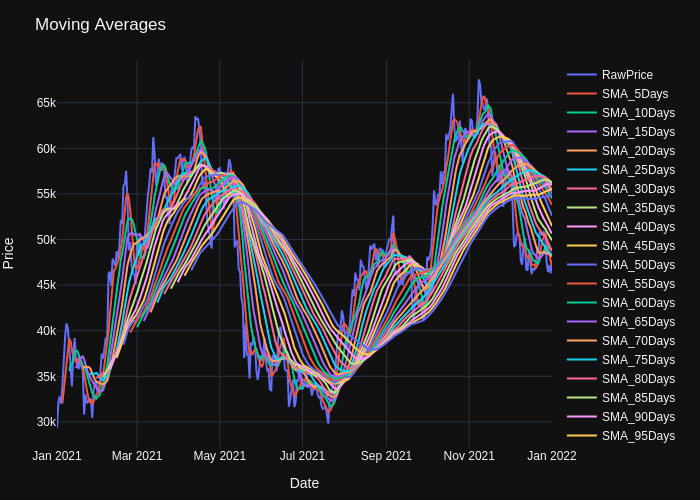

In [932]:
plot(
    [scatter(
        moving_average_results,
        x=:Date,
        y=column,
        mode="lines",
        name=string(column))
     for column in propertynames(moving_average_results)[2:end]],
    PlotlyJS.Layout(
        title="Moving Averages",
        width=900,
        height=600,
        xaxis_title="Date",
        yaxis_title="Price",)
)

### Sample:

In [933]:
first_ma = Symbol("SMA_15Days");
second_ma = Symbol("SMA_50Days");

co_mask = crossover(moving_average_results[:, first_ma], moving_average_results[:, second_ma]);
cu_mask = crossunder(moving_average_results[:, first_ma], moving_average_results[:, second_ma]);

co_results = moving_average_results[:, [:Date, first_ma]][co_mask, :];
cu_results = moving_average_results[:, [:Date, second_ma]][cu_mask, :];

buy_signal_annotations = [
    attr(
        x=date,
        y=price,
        text="Buy",
        showarrow=true,
        font=attr(
            # family="Courier New, monospace",
            size=16,
            color="rgb(255, 255, 255)"
        ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="(255, 255, 255)",
        ax=0,
        ay=30,
        bordercolor="rgb(255, 255, 255)",
        borderwidth=2,
        borderpad=4,
        bgcolor="#rgb(0, 125, 0)",
        opacity=1.0
    )
    for (date, price) ∈ eachrow(co_results)
]

sell_signal_annotations = [
    attr(
        x=date,
        y=price,
        text="Sell",
        showarrow=true,
        font=attr(
            # family="Courier New, monospace",
            size=16,
            color="rgb(255, 255, 255)"
        ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="(255, 255, 255)",
        ax=0,
        ay=-30,
        bordercolor="rgb(255, 255, 255)",
        borderwidth=2,
        borderpad=4,
        bgcolor="#rgb(200, 0, 0)",
        opacity=1.0
    )
    for (date, price) ∈ eachrow(cu_results)
]

annotations = append!(buy_signal_annotations, sell_signal_annotations);

plot([
        scatter(
            moving_average_results,
            x=:Date,
            y=:RawPrice,
            mode="lines",
            name=string(:BTC)),
        scatter(
            moving_average_results,
            x=:Date,
            y=first_ma,
            mode="lines",
            name=string(first_ma)),
        scatter(
            moving_average_results,
            x=:Date,
            y=second_ma,
            mode="lines",
            name=string(second_ma)),
    ],
    Layout(
        title="Moving Averages",
        width=900,
        height=600,
        annotations=annotations
        xaxis_title="Date",
        yaxis_title="Price",
    )
)

ErrorException: syntax: missing comma or ) in argument list

In [934]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;
cumulative_return(returns; side="Long") = side == "Long" ? prod(returns .+ 1) - 1 : -(prod(returns .+ 1) - 1);

In [935]:
sma_symbols = filter(sym -> startswith(string(sym), "SMA"), propertynames(moving_average_results));
i = 3;
j = 10;
ma1_symbol, ma2_symbol = sma_symbols[[i, j]];

co_mask = crossover(moving_average_results[:, ma1_symbol], moving_average_results[:, ma2_symbol]);
cu_mask = crossunder(moving_average_results[:, ma1_symbol], moving_average_results[:, ma2_symbol]);

co_results = moving_average_results[:, [:Date, ma1_symbol]][co_mask, :];
cu_results = moving_average_results[:, [:Date, ma2_symbol]][cu_mask, :];

buy_signals = DataFrame()
buy_signals[:, :Date] = co_results[:, :Date];
buy_signals[:, :Signal] .= "Buy";
sell_signals = DataFrame()
sell_signals[:, :Date] = cu_results[:, :Date];
sell_signals[:, :Signal] .= "Sell";

signals = vcat(buy_signals, sell_signals);
sort!(signals, :Date);

n = size(signals, 1);

signals_returns = DataFrame(
    MA1=Symbol[],
    MA2=Symbol[],
    StartDate=Date[],
    EndDate=Date[],
    Side=String[],
    StartDatePrice=Float64[],
    EndDatePrice=Float64[],
    CumulativeReturn=Float64[],
    Return=Float64[],
);
for k ∈ 1:n-1
    current_signal = signals[k, :Signal]
    side = current_signal == "Buy" ? "Long" : "Short"

    start_date = signals[k, :Date]
    end_date = signals[k+1, :Date]

    prices_in_interval = filter(:Date => date -> start_date ≤ date < end_date, btc_prices)
    returns_in_interval = pct_change(prices_in_interval[:, :BTC])
    interval_cumulative_return = cumulative_return(returns_in_interval, side=side)

    start_price = prices_in_interval[1, :BTC]
    end_price = prices_in_interval[end, :BTC]
    interval_return = side == "Long" ? end_price / start_price - 1 : -(end_price / start_price - 1)

    result = [
        ma1_symbol,
        ma2_symbol,
        start_date,
        end_date,
        side,
        start_price,
        end_price,
        interval_cumulative_return,
        interval_return,
    ]

    push!(signals_returns, result)
end

strategy_total_return = (prod(signals_returns[!, :CumulativeReturn] .+ 1) - 1) * 100;
strategy_total_return
signals_returns[:, end-4:end]
# signals_returns

,Side,StartDatePrice,EndDatePrice,CumulativeReturn,Return
,String,Float64,Float64,Float64,Float64
1,Short,54021.8,40008.4,0.259402,0.259402
2,Long,42235.5,42843.8,0.0144015,0.0144015
3,Short,40693.7,53967.8,-0.326197,-0.326197
4,Long,54968.2,56280.4,0.023872,0.023872


In [936]:
ma_signal_returns = DataFrame(
    MA1=Symbol[],
    MA2=Symbol[],
    StartDate=Date[],
    EndDate=Date[],
    Side=String[],
    StartDatePrice=Float64[],
    EndDatePrice=Float64[],
    CumulativeReturn=Float64[],
);

sma_symbols = filter(sym -> startswith(string(sym), "SMA"), propertynames(moving_average_results));
n = length(sma_symbols);
for i ∈ 1:n
    for j ∈ 1:i
        ma1_symbol, ma2_symbol = sma_symbols[[i, j]]

        co_mask = crossover(moving_average_results[:, ma1_symbol], moving_average_results[:, ma2_symbol])
        cu_mask = crossunder(moving_average_results[:, ma1_symbol], moving_average_results[:, ma2_symbol])

        co_results = moving_average_results[:, [:Date, ma1_symbol]][co_mask, :]
        cu_results = moving_average_results[:, [:Date, ma2_symbol]][cu_mask, :]

        buy_signals = DataFrame()
        buy_signals[:, :Date] = co_results[:, :Date]
        buy_signals[:, :Signal] .= "Buy"
        sell_signals = DataFrame()
        sell_signals[:, :Date] = cu_results[:, :Date]
        sell_signals[:, :Signal] .= "Sell"

        signals = vcat(buy_signals, sell_signals)
        sort!(signals, :Date)

        n = size(signals, 1)

        for k ∈ 1:n-1
            current_signal = signals[k, :Signal]
            side = current_signal == "Buy" ? "Long" : "Short"

            start_date = signals[k, :Date]
            end_date = signals[k+1, :Date]

            prices_in_interval = filter(:Date => date -> start_date ≤ date < end_date, btc_prices)
            returns_in_interval = pct_change(prices_in_interval[:, :BTC])
            interval_cumulative_return = cumulative_return(returns_in_interval, side=side)

            result = [
                ma1_symbol,
                ma2_symbol,
                start_date,
                end_date,
                side,
                prices_in_interval[1, :BTC],
                prices_in_interval[end, :BTC],
                interval_cumulative_return
            ]

            push!(ma_signal_returns, result)
        end
    end
end

first(ma_signal_returns, 5)

,MA1,MA2,StartDate,EndDate,Side,StartDatePrice,EndDatePrice
,Symbol,Symbol,Date,Date,String,Float64,Float64
1,SMA_10Days,SMA_5Days,2021-01-14,2021-01-30,Long,39187.3,34316.4
2,SMA_10Days,SMA_5Days,2021-01-30,2021-02-25,Short,34269.5,49705.3
3,SMA_10Days,SMA_5Days,2021-02-25,2021-03-04,Long,47093.9,50538.2
4,SMA_10Days,SMA_5Days,2021-03-04,2021-03-19,Short,48561.2,57858.9
5,SMA_10Days,SMA_5Days,2021-03-19,2021-03-21,Long,58346.7,58313.6


In [937]:
gb = groupby(ma_signal_returns, [:MA1, :MA2]);
moving_averages_total_return = combine(gb, :CumulativeReturn => ByRow(ret -> (prod(ret .+ 1) - 1) * 100) => :TotalCumulativeReturnPercentage);

arg_maximum_total_return_percentage = argmax(moving_averages_total_return.:TotalCumulativeReturnPercentage)
moving_averages_total_return[arg_maximum_total_return_percentage, :]

,MA1,MA2,TotalCumulativeReturnPercentage
,Symbol,Symbol,Float64
890,SMA_95Days,SMA_90Days,47.4015


# 5

### Lemma:
$$
    n \;\textnormal{has'nt any devisor less than} \; \sqrt{n} \Leftrightarrow \; \textnormal{n is prime}
$$

Proof By Contradiction.

In [938]:
function is_prime(n::Int64)
    if n ∈ [1, 0]
        return false
    end

    for i ∈ 2:floor(n^0.5)+1
        if n % i == 0
            return false
        end
    end

    return true
end

for n ∈ 1:100
    result = is_prime(n) ? "Prime" : "Composite"
    println("$n is $result")
end

1 is Composite
2 is Composite
3 is Prime
4 is Composite
5 is Prime
6 is Composite
7 is Prime
8 is Composite
9 is Composite
10 is Composite
11 is Prime
12 is Composite
13 is Prime
14 is Composite
15 is Composite
16 is Composite
17 is Prime
18 is Composite
19 is Prime
20 is Composite
21 is Composite
22 is Composite
23 is Prime
24 is Composite
25 is Composite
26 is Composite
27 is Composite
28 is Composite
29 is Prime
30 is Composite
31 is Prime
32 is Composite
33 is Composite
34 is Composite
35 is Composite
36 is Composite
37 is Prime
38 is Composite
39 is Composite
40 is Composite
41 is Prime
42 is Composite
43 is Prime
44 is Composite
45 is Composite
46 is Composite
47 is Prime
48 is Composite
49 is Composite
50 is Composite
51 is Composite
52 is Composite
53 is Prime
54 is Composite
55 is Composite
56 is Composite
57 is Composite
58 is Composite
59 is Prime
60 is Composite
61 is Prime
62 is Composite
63 is Composite
64 is Composite
65 is Composite
66 is Composite
67 is Prime
68 is Com

# 6

In [939]:
data = DataFrame(CSV.File("crypto_data2.csv"));

rename!(data, [
    :Date,
    :BTC,
    :ETH,
    :XRP,
    :SOL,
    :LUNA,
    :ADA,
    :AVA,
    :DOT,
    :DOGE,
    :MATIC,
]);

In [940]:
df = data[!, [:Date, :BTC, :ETH, :ADA, :XRP, :DOGE]];

In [941]:
pct_change(array) = array[2:end] ./ array[1:end-1] .- 1;
cumulative_return(returns; side="Long") = side == "Long" ? prod(returns .+ 1) - 1 : -(prod(returns .+ 1) - 1);

## Monthly Return 

In [942]:
using Dates: yearmonth

ym_gb = groupby(transform(df, :Date => (d -> yearmonth.(d)) => :YearMonth), :YearMonth)

coin_symbols = propertynames(df)[2:end];

intervals_returns = combine(ym_gb, coin_symbols .=> prices -> abs(prod(pct_change(prices) .+ 1) - 1));

In [943]:
rename!(
    intervals_returns,
    map((name) -> replace(name, "_function" => "Return"), names(intervals_returns))
);

first(intervals_returns, 5)

,YearMonth,BTCReturn,ETHReturn,ADAReturn,XRPReturn,DOGEReturn
,Tuple…,Float64,Float64,Float64,Float64,Float64
1,"(2019, 1)",0.100358,0.239728,0.0980798,0.150053,0.195234
2,"(2019, 2)",0.105174,0.27076,0.114923,0.0212662,0.0313152
3,"(2019, 3)",0.063691,0.0371617,0.611544,0.0254734,0.0431294
4,"(2019, 4)",0.286794,0.143381,0.0274298,0.010459,0.0211296
5,"(2019, 5)",0.587078,0.667183,0.295983,0.439382,0.364934


In [944]:
coin_symbols = propertynames(intervals_returns)[2:end];
for symbol ∈ coin_symbols
    monthly_maximum_return_index = argmax(intervals_returns[!, symbol])
    result = intervals_returns[monthly_maximum_return_index, [:YearMonth, symbol,]]

    println("$symbol Date Of Maximum Return Info:")
    println(result)
end

BTCReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ YearMonth  BTCReturn 
     │ Tuple…     Float64   
─────┼──────────────────────
   5 │ (2019, 5)   0.587078
ETHReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ YearMonth  ETHReturn 
     │ Tuple…     Float64   
─────┼──────────────────────
  25 │ (2021, 1)   0.800444
ADAReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ YearMonth  ADAReturn 
     │ Tuple…     Float64   
─────┼──────────────────────
  26 │ (2021, 2)    2.25361
XRPReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ YearMonth   XRPReturn 
     │ Tuple…      Float64   
─────┼───────────────────────
  23 │ (2020, 11)    1.77041
DOGEReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ YearMonth  DOGEReturn 
     │ Tuple…     Float64    
─────┼───────────────────────
  25 │ (2021, 1)     5.54283


### Uniform Weights Portfolio Best Month

In [945]:
n = length(coin_symbols)
portfolio_intervals_return = sum(Matrix(intervals_returns[!, 2:end]), dims=2) ./ n;

monthly_maximum_return_index = argmax(portfolio_intervals_return);
result = intervals_returns[monthly_maximum_return_index[1], :];
result

,YearMonth,BTCReturn,ETHReturn,ADAReturn,XRPReturn,DOGEReturn
,Tuple…,Float64,Float64,Float64,Float64,Float64
25,"(2021, 1)",0.12733,0.800444,0.966912,1.07339,5.54283


## Daily Return

In [946]:
first(df, 5)

,Date,BTC,ETH,ADA,XRP,DOGE
,Date,Float64,Float64,Float64,Float64,Float64
1,2019-01-01,3843.52,140.819,0.042547,0.364771,0.002392
2,2019-01-02,3943.41,155.048,0.045258,0.375243,0.002407
3,2019-01-03,3836.74,149.135,0.042682,0.360224,0.00236
4,2019-01-04,3857.72,154.582,0.043812,0.356747,0.002315
5,2019-01-05,3845.19,155.639,0.044701,0.355275,0.002319


In [947]:
coin_symbols = propertynames(df)[2:end];

intervals_returns = DataFrame();

intervals_returns[!, :Date] = df[2:end, :Date];
[intervals_returns[!, string(symbol)*"Return"] = pct_change(df[!, symbol]) for symbol ∈ coin_symbols];

In [948]:
first(intervals_returns, 5)

,Date,BTCReturn,ETHReturn,ADAReturn,XRPReturn,DOGEReturn
,Date,Float64,Float64,Float64,Float64,Float64
1,2019-01-02,0.025989,0.101039,0.0637178,0.0287084,0.00627085
2,2019-01-03,-0.0270497,-0.0381346,-0.0569181,-0.0400247,-0.0195263
3,2019-01-04,0.00546722,0.0365235,0.0264749,-0.00965235,-0.0190678
4,2019-01-05,-0.00324621,0.00683557,0.0202912,-0.00412616,0.00172787
5,2019-01-06,0.0601889,0.0135417,0.102011,0.0369291,0.00388101


In [949]:
coin_symbols = propertynames(intervals_returns)[2:end];
for symbol ∈ coin_symbols
    monthly_maximum_return_index = argmax(intervals_returns[!, symbol])
    result = intervals_returns[monthly_maximum_return_index, [:Date, symbol,]]

    println("$symbol Date Of Maximum Return Info:")
    println(result)
end


BTCReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ Date        BTCReturn 
     │ Date        Float64   
─────┼───────────────────────
 769 │ 2021-02-08   0.187465
ETHReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ Date        ETHReturn 
     │ Date        Float64   
─────┼───────────────────────
 733 │ 2021-01-03   0.259475
ADAReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ Date        ADAReturn 
     │ Date        Float64   
─────┼───────────────────────
 771 │ 2021-02-10   0.322384
XRPReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ Date        XRPReturn 
     │ Date        Float64   
─────┼───────────────────────
 760 │ 2021-01-30   0.560109
DOGEReturn Date Of Maximum Return Info:
DataFrameRow
 Row │ Date        DOGEReturn 
     │ Date        Float64    
─────┼────────────────────────
 758 │ 2021-01-28     3.55547


### Uniform Weights Portfolio Best Day

In [951]:
n = length(coin_symbols)
portfolio_intervals_return = sum(Matrix(intervals_returns[!, 2:end]), dims=2) ./ n;

monthly_maximum_return_index = argmax(portfolio_intervals_return);
result = intervals_returns[monthly_maximum_return_index[1], :];
result

,Date,BTCReturn,ETHReturn,ADAReturn,XRPReturn,DOGEReturn
,Date,Float64,Float64,Float64,Float64,Float64
758,2021-01-28,0.0996811,0.0632827,0.105561,0.0483404,3.55547


# 7

In [952]:
@enum Shape begin
    ROCK = 0
    PAPER = 1
    SCISSOR = 2
end;

In [953]:
using IJulia

n_rounds = 5;
n_user_win_rounds = 0;
n_prog_win_rounds = 0;
n_draw_rounds = 0
for k_round ∈ 1:n_rounds
    # For User Input:
    #  user_shape_index = IJulia.readprompt("Rock Paper Scissors:3");
    user_shape_index = rand(0:2)
    user_shape = Shape(user_shape_index)
    user_shape_code = Int(user_shape)

    prog_shape_index = rand(0:2)
    prog_shape = Shape(prog_shape_index)
    prog_shape_code = Int(prog_shape)

    println("User Shape: $user_shape Program Shape: $prog_shape")
    # Rule:
    if user_shape_code == prog_shape_code
        println("Round $k_round: Draw!")
        n_draw_rounds += 1
    elseif (user_shape_code + 1) % 3 == prog_shape_code
        println("Round $k_round: Program Win!")
        n_prog_win_rounds += 1
    else
        println("Round $k_round: User Win!")
        n_user_win_rounds += 1
    end
end

println("N/O User Win: $n_user_win_rounds N/O Program Win: $n_prog_win_rounds N/O Draw: $n_draw_rounds");

if n_user_win_rounds > n_prog_win_rounds
    println("User Win!")
elseif n_user_win_rounds < n_prog_win_rounds
    println("Program Win!")
else
    println("Draw!")
end

User Shape: ROCK Program Shape: ROCK
Round 1: Draw!
User Shape: PAPER Program Shape: ROCK
Round 2: User Win!
User Shape: PAPER Program Shape: SCISSOR
Round 3: Program Win!
User Shape: SCISSOR Program Shape: ROCK
Round 4: Program Win!
User Shape: PAPER Program Shape: SCISSOR
Round 5: Program Win!
N/O User Win: 1 N/O Program Win: 3 N/O Draw: 1
Program Win!


## Simulation

### Equal Weights Scenario

In [954]:
using IJulia

n_games = 1_000_000;
n_user_win_games = 0;
n_prog_win_games = 0;
n_draw_games = 0;

for k_game ∈ 1:n_games
    n_rounds = 5
    n_user_win_rounds = 0
    n_prog_win_rounds = 0
    n_draw_rounds = 0

    for k_round ∈ 1:n_rounds
        #  user_shape_index = IJulia.readprompt("Rock Paper Scissors:3");
        user_shape_index = rand(0:2)
        user_shape = Shape(user_shape_index)
        user_shape_code = Int(user_shape)

        prog_shape_index = rand(0:2)
        prog_shape = Shape(prog_shape_index)
        prog_shape_code = Int(prog_shape)

        # Rule:
        if user_shape_code == prog_shape_code
            n_draw_rounds += 1
        elseif (user_shape_code + 1) % 3 == prog_shape_code
            n_prog_win_rounds += 1
        else
            n_user_win_rounds += 1
        end
    end

    if n_user_win_rounds > n_prog_win_rounds
        n_user_win_games += 1
    elseif n_user_win_rounds < n_prog_win_rounds
        n_prog_win_games += 1
    else
        n_draw_games += 1
    end
end

println("Sim Results:")
println("User Wins: $n_user_win_games Prog Wins: $n_prog_win_games Draws: $n_draw_games");

Sim Results:
User Wins: 394547 Prog Wins: 395681 Draws: 209772


### Unequal Weights Scenario: ($\frac{1}{6}, \frac{2}{6}, \frac{3}{6} $)

In [955]:
using StatsBase: Weights, sample

In [956]:
using IJulia

n_games = 1_000_000;
n_user_win_games = 0;
n_prog_win_games = 0;
n_draw_games = 0;

items = [0, 1, 2];
weights = [1 / 6, 2 / 6, 3 / 6];

for k_game ∈ 1:n_games
    n_rounds = 5
    n_user_win_rounds = 0
    n_prog_win_rounds = 0
    n_draw_rounds = 0

    for k_round ∈ 1:n_rounds
        user_shape_index = sample(items, Weights(weights))
        user_shape = Shape(user_shape_index)
        user_shape_code = Int(user_shape)

        prog_shape_index = sample(items, Weights(weights))
        prog_shape = Shape(prog_shape_index)
        prog_shape_code = Int(prog_shape)

        # Rule:
        if user_shape_code == prog_shape_code
            n_draw_rounds += 1
        elseif (user_shape_code + 1) % 3 == prog_shape_code
            n_prog_win_rounds += 1
        else
            n_user_win_rounds += 1
        end
    end

    if n_user_win_rounds > n_prog_win_rounds
        n_user_win_games += 1
    elseif n_user_win_rounds < n_prog_win_rounds
        n_prog_win_games += 1
    else
        n_draw_games += 1
    end
end

println("Sim Results:")
println("User Wins: $n_user_win_games Prog Wins: $n_prog_win_games Draws: $n_draw_games");

Sim Results:
User Wins: 389840 Prog Wins: 389939 Draws: 220221


The performance of both algorithms seems to be the same. Theoretically, this seems natural. In fact, it is like examining two noise signals.
Due to the symmetry, the probability of winning, losing and drawing is equal for both players.